In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets

import numpy as np

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
a = torch.arange(60.).reshape(3, 4, 5)
b = torch.arange(24.).reshape(4, 3, 2)
torch.tensordot(a, b, dims=([1, 0], [0, 1])).shape

torch.Size([5, 2])

In [3]:
import tqdm

In [4]:
a = torch.Tensor(np.arange(1*3*4).reshape(1, 3, 4))
b = torch.Tensor(np.arange(4*5*6).reshape(4, 5, 6))
c = torch.Tensor(np.arange(6*7*8).reshape(6, 7, 8))
d = torch.Tensor(np.arange(8*9*1).reshape(8, 9, 1))


In [5]:
ab = np.einsum('ijk,kln->ijln', a, b)
abc = np.einsum('ijkl,lnm->ijknm', ab, c)
abcd = np.einsum('ijkln,nmo->ijklmo', abc, d)
print(ab.shape, abc.shape, abcd.shape)
abcd_r = abcd.reshape(3,5,7,9)

(1, 3, 5, 6) (1, 3, 5, 7, 8) (1, 3, 5, 7, 9, 1)


In [6]:
type(ab)

numpy.ndarray

In [7]:
a_t = np.random.rand(1, 3, 4)
b_t = np.random.rand(4, 5, 6)
c_t = np.random.rand(6, 7, 8)
d_t = np.random.rand(8, 9, 1)

In [8]:
ab_t = np.einsum('ijk,kln', a_t, b_t)
abc_t = np.einsum('ijkl,lnm->ijknm', ab_t, c_t)
abcd_t = np.einsum('ijkln,nmo->ijklmo', abc_t, d_t)
print(ab_t.shape, abc_t.shape, abcd_t.shape)
test_tensor = abcd_t.reshape(3,5,7,9)

(1, 3, 5, 6) (1, 3, 5, 7, 8) (1, 3, 5, 7, 9, 1)


In [9]:
np.tensordot(abcd_r, test_tensor, axes=[[0,1,2,3],[0,1,2,3]])

array(4.40405552e+12)

In [10]:
res = np.array([1]).reshape(1, 1)
res = np.einsum('ix, inj, xny -> jy', res, a, a_t)
print(res.shape)
#res * np.einsum('inj, iny -> jy', a, at)
res = np.einsum('ix, inj, xny -> jy', res, b, b_t)
print(res.shape)
res = np.einsum('ix, inj, xny -> jy', res, c, c_t)
print(res.shape)
res = np.einsum('ix, inj, xny -> jy', res, d, d_t)
print(res.shape)
#np.einsum('ix, inj, xny -> jy', res, c, ct)
res

# я удивлен, но я все правильно понял)

(4, 4)
(6, 6)
(8, 8)
(1, 1)


array([[4.40405556e+12]])

In [11]:
# тестим хрень
import numpy as np
from ht.ht import *
r_1 = 3
r_2 = 4

content_1 = [
    [
        torch.Tensor(np.random.rand(1, 30, r_1)),
        torch.Tensor(np.random.rand(r_1, r_1, r_1)),
        torch.Tensor(np.random.rand(r_1, 40, 1))
    ],
    torch.Tensor(np.random.rand(r_1, 1, r_1)),
    [
        torch.Tensor(np.random.rand(1, 60, r_1)),
        torch.Tensor(np.random.rand(r_1, r_1, r_1)),
        torch.Tensor(np.random.rand(r_1, 50, 1)) 
    ]
]

content_2 = [
    [
        torch.Tensor(np.random.rand(1, 30, r_2)),
        torch.Tensor(np.random.rand(r_2, r_2, r_2)),
        torch.Tensor(np.random.rand(r_2, 40, 1))
    ],
    torch.Tensor(np.random.rand(r_2, 1, r_2)),
    [
        torch.Tensor(np.random.rand(1, 60, r_2)),
        torch.Tensor(np.random.rand(r_2, r_2, r_2)),
        torch.Tensor(np.random.rand(r_2, 50, 1)) 
    ]
]


In [12]:
content_3 = [
    torch.Tensor(np.random.rand(1, 30, r_2)),
    [
        torch.Tensor(np.random.rand(r_2, 40, r_2)),
        [
            torch.Tensor(np.random.rand(r_2, 60, r_2)),
            torch.Tensor(np.random.rand(r_2, 50, 1))
        ]
    ]
]

In [13]:
HT_1 = HTuckerNode(content_1)
HT_2 = HTuckerNode(content_2)

In [14]:
type(HT_1.content[0])

ht.ht.HTuckerNode

In [15]:
HT_1

|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])torch.Size([1, 1, 30, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])torch.Size([1, 3, 40, 1])
|torch.Size([1, 3, 1, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])torch.Size([1, 1, 60, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])torch.Size([1, 3, 50, 1])

In [16]:
HT_1.get_full().shape

torch.Size([1, 3, 40, 1]) torch.Size([1, 3, 3, 3])
ls torch.Size([1, 3, 40, 3]) torch.Size([1, 1, 30, 3])
torch.Size([1, 1, 60, 3]) torch.Size([1, 3, 3, 3])
torch.Size([1, 1, 30, 40, 3]) torch.Size([1, 3, 1, 3])


torch.Size([1, 1, 30, 40, 60, 50, 1])

In [17]:
A = np.array([[1, 1, 1],
           [2, 2, 2],
           [5, 5, 5]])

B = np.array([[0, 1, 0],
           [1, 1, 0],
           [1, 1, 1]])

In [18]:
BM = np.stack((A, B), axis=0)

In [19]:
BMM = np.einsum("bij, bjk, bkl -> bil", BM, BM, BM)

In [20]:
B @ B @ B

array([[1, 2, 0],
       [2, 3, 0],
       [4, 6, 1]])

In [21]:
BMM.shape

(2, 3, 3)

In [22]:
a = np.array([[1,2], [3,4], [5,6]])
b = np.array([[4,2], [5,6], [32,4]])
b = np.array([1, 1, 1])
#np.einsum('bi, bi, b ->b', a, b, c)

In [23]:
HT_1

|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])torch.Size([1, 1, 30, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])torch.Size([1, 3, 40, 1])
|torch.Size([1, 3, 1, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])torch.Size([1, 1, 60, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])
|torch.Size([1, 3, 1, 3])|torch.Size([1, 3, 3, 3])torch.Size([1, 3, 50, 1])

In [24]:
HT_2

|torch.Size([1, 4, 1, 4])|torch.Size([1, 4, 4, 4])torch.Size([1, 1, 30, 4])
|torch.Size([1, 4, 1, 4])|torch.Size([1, 4, 4, 4])
|torch.Size([1, 4, 1, 4])|torch.Size([1, 4, 4, 4])torch.Size([1, 4, 40, 1])
|torch.Size([1, 4, 1, 4])
|torch.Size([1, 4, 1, 4])|torch.Size([1, 4, 4, 4])torch.Size([1, 1, 60, 4])
|torch.Size([1, 4, 1, 4])|torch.Size([1, 4, 4, 4])
|torch.Size([1, 4, 1, 4])|torch.Size([1, 4, 4, 4])torch.Size([1, 4, 50, 1])

In [25]:
HT_1.scalar_product(HT_2)

tensor([[[[[5.0303e+08]]]]])

In [26]:
HT_1_full = HT_1.get_full()
HT_2_full = HT_2.get_full()

np.tensordot(HT_1_full, HT_2_full, axes=[list(range(len(HT_1_full.shape))), list(range(len(HT_2_full.shape)))])

torch.Size([1, 3, 40, 1]) torch.Size([1, 3, 3, 3])
ls torch.Size([1, 3, 40, 3]) torch.Size([1, 1, 30, 3])
torch.Size([1, 1, 60, 3]) torch.Size([1, 3, 3, 3])
torch.Size([1, 1, 30, 40, 3]) torch.Size([1, 3, 1, 3])
torch.Size([1, 4, 40, 1]) torch.Size([1, 4, 4, 4])
ls torch.Size([1, 4, 40, 4]) torch.Size([1, 1, 30, 4])
torch.Size([1, 1, 60, 4]) torch.Size([1, 4, 4, 4])
torch.Size([1, 1, 30, 40, 4]) torch.Size([1, 4, 1, 4])


array(5.0302902e+08, dtype=float32)

In [27]:
HT_1_full.shape

torch.Size([1, 1, 30, 40, 60, 50, 1])

In [28]:
torch.Tensor([3])

tensor([3.])

In [29]:
fourier_basis(0)

functools.partial(<function ncos at 0x7fb858600dc0>, 0)

In [30]:
fourier_basis(0)(np.array([0, 0, 1, 2])).shape

torch.Size([1, 4])

In [31]:
basic_size = 64

# try multidim normal, dim = 8, no normal init yet, so doing by hands


functional_content = [
    [
        [
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
            ,
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
        ],
        [
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
            ,
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
        ]    
    ],
    [
        [
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
            ,
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
        ],
        [
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
            ,
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
        ]    
    ]
]



functional_content = [
    FuncList(
        [fourier_basis(i) for i in range(basic_size)]
    )
    ,
    FuncList(
        [fourier_basis(i) for i in range(basic_size)]
    )
]





In [32]:
functional_content[0][0]

functools.partial(<function ncos at 0x7fb858600dc0>, 0)

In [33]:
len(functional_content[1])

64

In [34]:
hidden_dim = 16
content_sample = [
    [
        [
            torch.Tensor(np.random.rand(1, basic_size, hidden_dim)),
            torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)),
            torch.Tensor(np.random.rand(hidden_dim, basic_size, 1))
        ],
    torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)),
        [
            torch.Tensor(np.random.rand(1, basic_size, hidden_dim)),
            torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)),
            torch.Tensor(np.random.rand(hidden_dim, basic_size, 1))
        ]
    ],
    torch.Tensor(np.random.rand(hidden_dim, 1, hidden_dim)),
    [
        [
            torch.Tensor(np.random.rand(1, basic_size, hidden_dim)),
            torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)),
            torch.Tensor(np.random.rand(hidden_dim, basic_size, 1))
        ],
        torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)),
        [
            torch.Tensor(np.random.rand(1, basic_size, hidden_dim)),
            torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)),
            torch.Tensor(np.random.rand(hidden_dim, basic_size, 1))
        ]
    ]
]

content_sample = [
    torch.Tensor(np.random.rand(1, basic_size, hidden_dim)),
    torch.Tensor(np.random.rand(hidden_dim, 1, hidden_dim)),
    torch.Tensor(np.random.rand(hidden_dim, basic_size, 1))
]


In [35]:
type(functional_content[0])

ht.ht.FuncList

In [36]:
basis_functions = FunctionalHTuckerNode(functional_content)

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



class HTModel(nn.Module):
    def __init__(self, alpha, basis_functions, device='cpu'):
        super(HTModel, self).__init__()
        self.device = device
        self.alpha = HTuckerNode(alpha, make_optim=True, device=self.device) #инитим рандомно пока, тут хранятся коэффициенты
        self.basis_functions = basis_functions
    def forward(self, x):
        
        #тут нужно в иксе вычислить значения всех базисных функций. В итоге это тензор ранга 1, как я понимаю
        phi_big = HTuckerNode(self.basis_functions.get_val(x), device=self.device)
        
        out = self.alpha.scalar_product(phi_big) # scalar, size (1,1,1,1)
        return out #torch.pow(out, 2), add it later

def my_loss(model, x, debug=False):
    # это вычисление нашего интегрального лосса в точке
    ds = 0 #нужно получить матрицу D по формуле из иксов
    #кажется, что в случае базиса фурье это просто единичная матрица, поэтому пока опустим.
    comp_1 = model.alpha.scalar_product(model.alpha)
    comp_2 = -2 * model(x)
    
    if debug:
        print(comp_1, comp_2)
    
    return torch.sum(comp_1 + comp_2)


model = HTModel(content_sample, basis_functions).to(device)

criterion = my_loss

print(model)

HTModel()


In [38]:
optimizer = torch.optim.Adam(model.alpha.get_params_for_optim(), lr = 1e-4)

In [39]:
mock_data = sklearn.datasets.make_moons(n_samples=10000, shuffle=True, noise=0.003, random_state=None)[0]
#np.random.normal(size = (10000, 2))
mock_data -= mock_data.mean(axis = 0)
mock_data *= ((np.pi - 1) / np.abs(mock_data).max(axis = 0))

In [40]:

md_df = pd.DataFrame(mock_data[:, :2], columns=['a','b'])

In [41]:
mock_data

array([[-0.71094385,  0.66283734],
       [ 1.45132095, -1.70576757],
       [ 2.01448331, -0.42559535],
       ...,
       [-1.74802597,  1.2251797 ],
       [-1.0678719 ,  2.02941699],
       [-0.30886315,  2.01049157]])

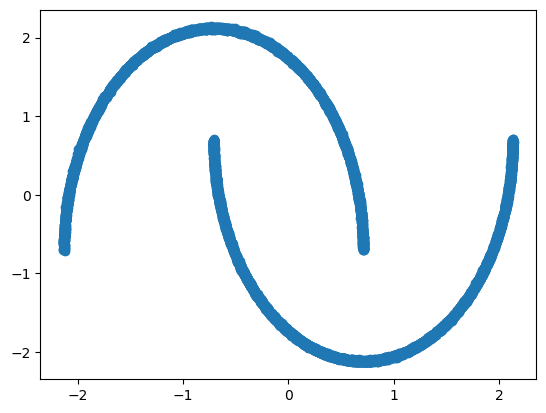

In [42]:
plt.scatter(mock_data[:, 0], mock_data[:, 1])

<AxesSubplot: xlabel='a', ylabel='b'>

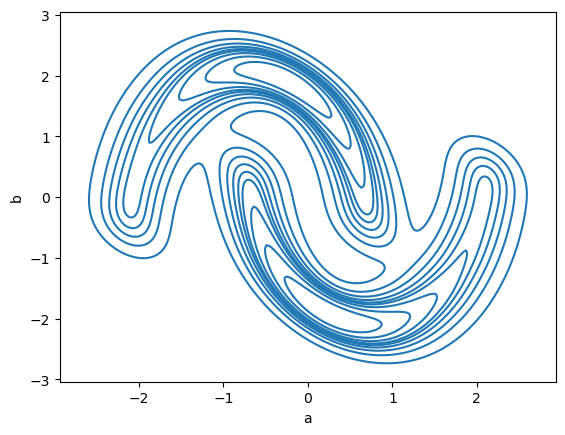

In [43]:
sns.kdeplot(data=md_df, x='a', y='b')

In [44]:
#model.basis_functions.get_val(np.array([0,0]))

In [45]:
model(mock_data[0]).shape

torch.Size([1, 1, 1, 1, 1])

In [46]:
criterion(model, mock_data[0])

tensor(4734889.5000, grad_fn=<SumBackward0>)

In [47]:
from sklearn.utils import shuffle

In [48]:
losses = []

In [49]:

epochs = 60
batch_size = 100
loss = 0

for i in tqdm.tqdm(range(epochs)):
    cum_losses = []
    loss = 0
    ds = shuffle(mock_data)
    for j in range(len(ds) // batch_size):
        
        loss += criterion(model, ds[j * batch_size: (j + 1) * batch_size])
        
        #print(loss)
        

        loss_fin = loss
        #print(loss.shape)

        loss_fin.backward()

        cum_losses.append(loss_fin.detach().numpy())

        loss = 0
        optimizer.step()
        optimizer.zero_grad()
    
    losses.append(np.mean(cum_losses) / batch_size)

100%|██████████| 60/60 [00:39<00:00,  1.54it/s]


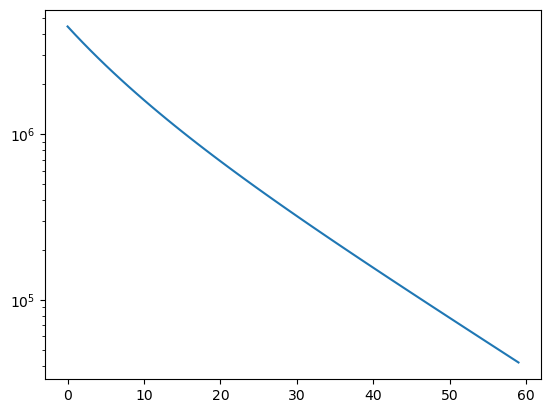

In [50]:
plt.plot(losses[:])
plt.yscale('log')

In [51]:
ls = 0
nm_test = 100
for i in range(nm_test):
    ls += criterion(model, mock_data[i], debug=False)
print(ls/nm_test)

tensor(40803.7109, grad_fn=<DivBackward0>)


In [52]:
model(mock_data[6]), mock_data[6]

(tensor([[[[[-1.9825]]]]], grad_fn=<ViewBackward0>),
 array([ 0.1046989 , -1.85247918]))

In [53]:
from itertools import product

In [54]:
grid = product(np.linspace(-np.pi, np.pi, num = 100), np.linspace(-np.pi, np.pi, num = 100))

In [55]:
nm = 50
ans_list = np.zeros(shape=(nm, nm))
for i, valx in enumerate(np.linspace(-np.pi, np.pi, num = nm)):
    for j, valy in enumerate(np.linspace(-np.pi, np.pi, num = nm)):
        ans_list[i][j] = model(np.array([valx, valy]))#, 0, 0, 0, 0, 0, 0]))

<AxesSubplot: >

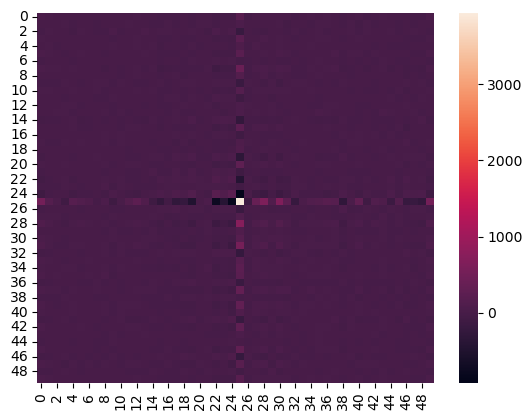

In [56]:

sns.heatmap(ans_list)